# Measuring the Universe acceleration: H0 (Hubble-Lemaitre constant)

In this notebook, I will measure the Hubble-Lemaitre Constant (H0), by building a hierarchical model for the distance ladder and ultimately using SNe Ia as standard candles. 
The data and general method we’ll use is described in Riess et al. 2016 and Riess et al. 2009.

In their papers, they used a maximum likelihood approach while in this notebook I will use a hierarchical Bayesian approach.

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
plt.rcParams['legend.numpoints']=1
plt.rcParams['xtick.major.size'] = 11
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 11
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['xtick.minor.visible']=True #See minor tick
plt.rcParams['text.usetex']=True #use Latex
plt.rcParams['axes.linewidth']=2 #width axes
plt.rcParams['axes.labelsize']=25 #
plt.rcParams['ytick.labelsize']=22 #fontsize of tick labels
plt.rcParams['xtick.labelsize']=22 #fontsize of tick labels
plt.rcParams['ytick.direction']='inout' ## direction: in, out, or inout
plt.rcParams['xtick.direction']='inout' ## direction: in, out, or inout

plt.rcParams['xtick.major.top']=True #draw x axis top major ticks
plt.rcParams['xtick.major.bottom']=True #draw x axis bottom major ticks
plt.rcParams['xtick.minor.top']=True ## draw x axis top minor ticks
plt.rcParams['xtick.minor.bottom']=True #draw x axis bottom minor ticks

plt.rcParams['ytick.major.left']=True #draw y axis left major ticks
plt.rcParams['ytick.major.right']=True #draw y axis right major ticks
plt.rcParams['ytick.minor.left']=True ## draw y axis left minor ticks
plt.rcParams['ytick.minor.right']=True #draw y axis right minor ticks


plt.rcParams['font.weight']='bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize']=22
plt.rcParams['figure.titlesize']=22

plt.rcParams['text.latex.preamble']=[r'\boldmath']

<font color='red'>
a) Download the Cepheid data in Table 4 of R16. Discard the data for Cepheids in M31. Why are we
not using the M31 data?
</font>

In [2]:
Cepheid_tab = open('Table_4_R16.txt','r')
lines = Cepheid_tab.read().split("\n")

gal_names = []
ra_gal = []
dec_gal = []
star_ID = []
Period = []
V_I = [] #F555W-F814W
mag_H = [] #F160W
err_mag_H = []
sig_tot = [] #total uncertainty Cepheids
Z=[] #metalicity

for i in range(len(lines)-1):
    line_contents = lines[i].split()

    gal_names.append(line_contents[0])
    ra_gal.append(float(line_contents[1]))
    dec_gal.append(float(line_contents[2]))
    star_ID.append(line_contents[3])
    Period.append(float(line_contents[4]))
    V_I.append(float(line_contents[5]))
    mag_H.append(float(line_contents[6]))
    err_mag_H.append(float(line_contents[7]))
    Z.append(float(line_contents[8]))

#dataframe
d = {'gal_names':gal_names , 'ra_gal':ra_gal,'dec_gal': dec_gal,'Ceph_index':star_ID,  'period':Period, 'VI':V_I, 'f160w':mag_H, 'err_f160w':err_mag_H,'Z':Z }
df = pd.DataFrame(data=d)


#Remove M31
df_cut=df[df['gal_names']!='M31']

M31 called also Andromeda, is moving toward us unlike the other galaxies. For this reason, to measure the expansion velocity we prefer to remove it from the sample.

<font color='red'>
b) For each of the remaining 20 galaxies, plot the Cepheid period vs. apparent “Wesenheit” magnitude
relation. First you’ll need to calculate the Wesenheit magnitude. Explain what the point of Wesenheit
magnitudes is. Why don’t we just use F160W?

Color the Cepheids in each galaxy by their metallicity. The zeropoints of the relation will be different
in each galaxy, since the galaxies are at different distances. Comment on any trends with metallicity.
</font>

-> Flux measurements are required in order to use Cepheids as standard candles for distance measurement and are commonly done with HST filters at known phases in optical (F555W, F814W) and NIR (F160W) bands to correct for the effects of interstellar dust and the nonzero width in temperature of the Cepheid instability strip. We rely primarily on NIR "Wesenheit" magnitudes (Madore 1982), defined as:
m_Wesenheit=m_H- R(V-I)

-> It not easy to see in the Figure below but the zero-point of the PL relation is sensitive to metal abundance. For example in N4258, we see that the metal-rich Cepheids have a different zero-point that the metal-poor Cepheids (higher metallicity -> longer period)

In [3]:
R = 0.4  ## assume R = 0.4 since it ranges from 0.3-0.5 
wesmag = pd.to_numeric(df_cut['f160w']) - R*pd.to_numeric(df_cut['VI'])  #numeric to convert object to num   

#add wesmag to df_cut
df_cut.insert(9,'wesmag',wesmag,True)#or df_cut['wesmag'] = wesmag

Number of galaxies used: 20


Text(0.07,0.5,'\\textbf{Wesenheit [mag]}')

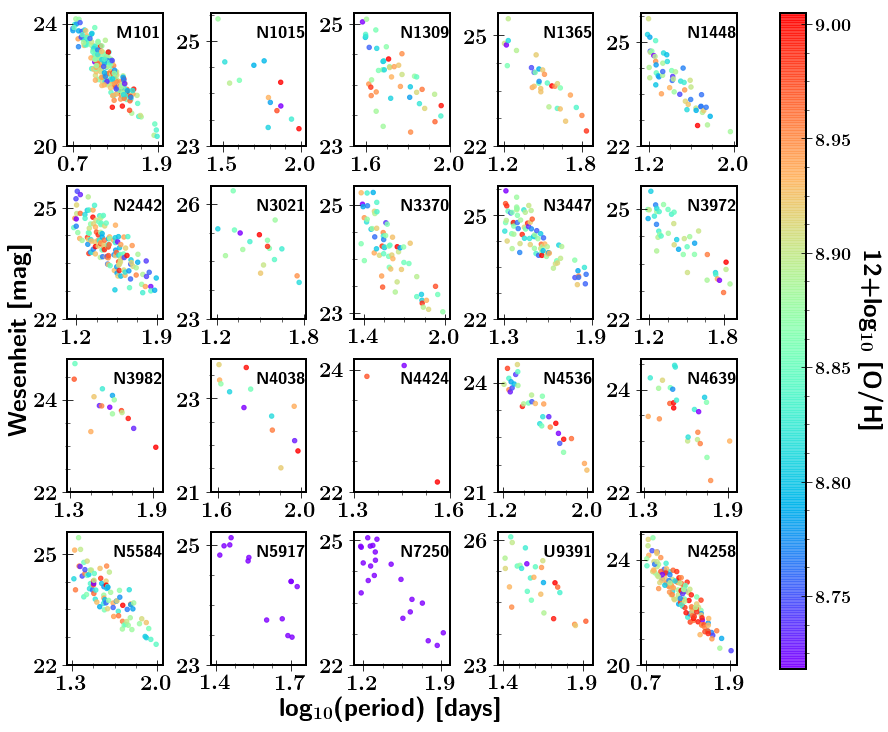

In [4]:
print('Number of galaxies used: %s'%(df_cut['gal_names'].unique().size)) #20 galaxies

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 12))

for i, ax in enumerate(axes.flatten()):
    x_plot=np.log10(pd.to_numeric(df_cut[df_cut['gal_names']==df_cut['gal_names'].unique()[i]]['period']))
    y_plot=df_cut[df_cut['gal_names']==df_cut['gal_names'].unique()[i]]['wesmag']
    c=df_cut[df_cut['gal_names']==df_cut['gal_names'].unique()[i]]['Z']
    s=20
    ax.text(0.75, 0.85,r'\textbf{%s}'%df_cut['gal_names'].unique()[i],horizontalalignment='center',verticalalignment='center',fontsize=17,transform = ax.transAxes)
    sc=ax.scatter(x_plot,y_plot,marker='o',alpha=0.8,c=c,s=s, cmap='rainbow')
    ax.set_yticks([int(min(y_plot)),int(max(y_plot))])
    ax.set_xticks([float("{:.1f}".format(min(x_plot))),float("{:.1f}".format(max(x_plot)))])
    c


#Color bar
cax = plt.axes([0.95, 0.120, 0.03, 0.76])
clb = plt.colorbar(sc,cax=cax)
clb.ax.set_ylabel(r'\textbf{12+log$_{10}$ [O/H]}', labelpad=30, rotation=270,fontsize=plt.rcParams['axes.labelsize'])
clb.ax.tick_params(labelsize=18)

fig.subplots_adjust(hspace=0.3)   
fig.subplots_adjust(wspace=0.5)   
fig.text(0.5, 0.07, r'\textbf{log$_{10}$(period) [days]}', va='center', ha='center',fontsize=plt.rcParams['axes.labelsize'])
fig.text(0.07, 0.5, r'\textbf{Wesenheit [mag]}', va='center', ha='center', rotation='vertical',fontsize=plt.rcParams['axes.labelsize'])


<font color='red'>
c) The galaxy NGC 4258 is particularly useful to us because its distance is known very precisely. Explain physically how we know this galaxy’s distance. That is, what quantity was measured, and how was
this measurement used to calculate the galaxy’s distance? We can’t we do this for all galaxies?
<font>

NGC 4258 offers attractive benefits over the use of the Large Magellanic Cloud (LMC) or the Milky Way Galaxy as an anchor of the distance  ladder:
<dd>(1) all of its Cepheids can be treated as being at a single distance determined geometrically from the  Keplerian  motion  of  its  masers  as  7.2 ± 0.5 Mpc. Maser=X-ray emission from hot gas very close to the black holes can stimulate water molecules further out to emit maser (i.e., microwave laser-like) emission.<dd> 
<dd>(2) more than a decade of tracking its masers has resulted in little change to its distance while steadily increasing itsprecision from 7% (Herrnstein et al.1999) to 5.5% (Humphreys et al.2005) to 3% (Humphreysetal.2008;E.M.L.Humphreys 2009; Greenhill et al.2009)<dd>
<dd>(3) the geometric distance measurement can be internally cross checked via proper motion and centripetal acceleration, and the method can be externally tested by measurements of other maser systems (Braatz et al.2008; Greenhill et al.2009)<dd>
<dd>(4) its Cepheids havea metallicity similar to those found in the hosts of SNe Ia (Riess et al.2009)<dd>

How do we use maser to measure distance?

The emission lines from these maser regions are so sharp and strong, and the angles measurable by very long baseline interferometry so exquisitely small (milliarcseconds) that it is possible to measure maser orbital velocities to within a fraction of a parsec of the black hole, just a few tens of thousands of Schwardschild radii. Further, these masers are orbiting so rapidly (~1000 km/s) that after a few years it is possible to measure quite readily orbital accelerations. These measurements can be used to obtain very direct "geometric" distances for their host galaxies, free of the specific systematic and calibration errors


<font color='red'>
Select just the Cepheids in NGC 4258. Fit their period–apparent Wesenheit magnitude relation, in the
form:

m WH = zpW,NGC4258 + bW log P + ZW ∆log (O/H) .

Here m WH is the apparent Wesenheit magnitude, P is the period in days, and ∆log (O/H) is the metallicity
with respect to a reference value. You can calculate ∆log (O/H) from the data in Table 4 using the Solar
oxygen abundance, log (O/H) = 8.66, as the reference. zp W,NGC4258 , bW , and ZW are free parameters to be
fit. In addition to these, also fit for the intrinsic scatter in the relation.
<font>

First let's use EMCEE to fit

In [5]:
#We select only NGC 4258
per_N4258 = df_cut[df_cut['gal_names']=="N4258"]['period']
Z_N4258 = df_cut[df_cut['gal_names']=="N4258"]['Z']
wesmags_N4258 = df_cut[df_cut['gal_names']=="N4258"]['wesmag']
err_mag_N4258 = df_cut[df_cut['gal_names']=="N4258"]['err_f160w']
Z_ref = 8.66

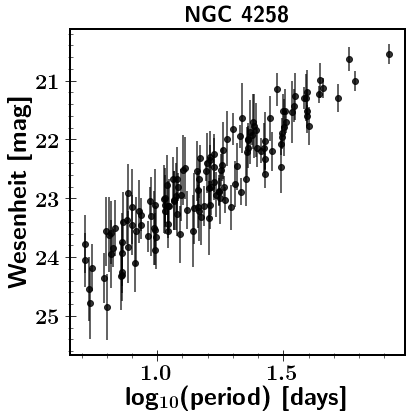

In [6]:
#Let's plot Cepheid period vs. apparent “Wesenheit” magnitude relation
fig,ax1 = plt.subplots(figsize=(6,6), facecolor='w', edgecolor='k')
ax1.errorbar(np.log10(per_N4258), wesmags_N4258,yerr=err_mag_N4258,marker='o',color='k',alpha=0.8,linestyle='None')
ax1.set_ylabel(r'\textbf{Wesenheit [mag]}')
ax1.set_xlabel(r'\textbf{log$_{10}$(period) [days]}')
ax1.set_title(r'\textbf{NGC 4258}')
plt.gca().invert_yaxis()              

Mean acceptance fraction:0.601


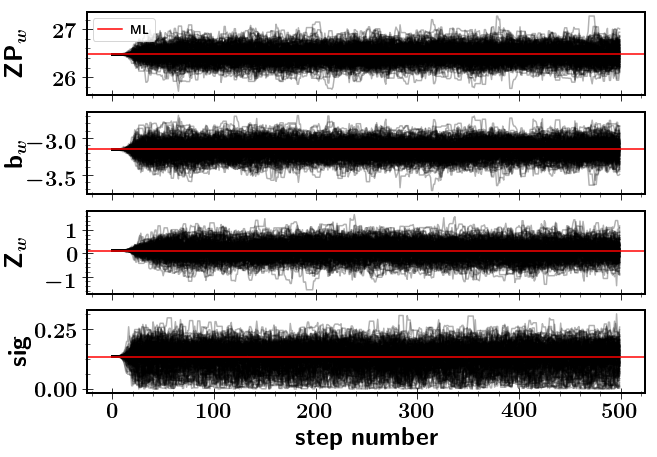

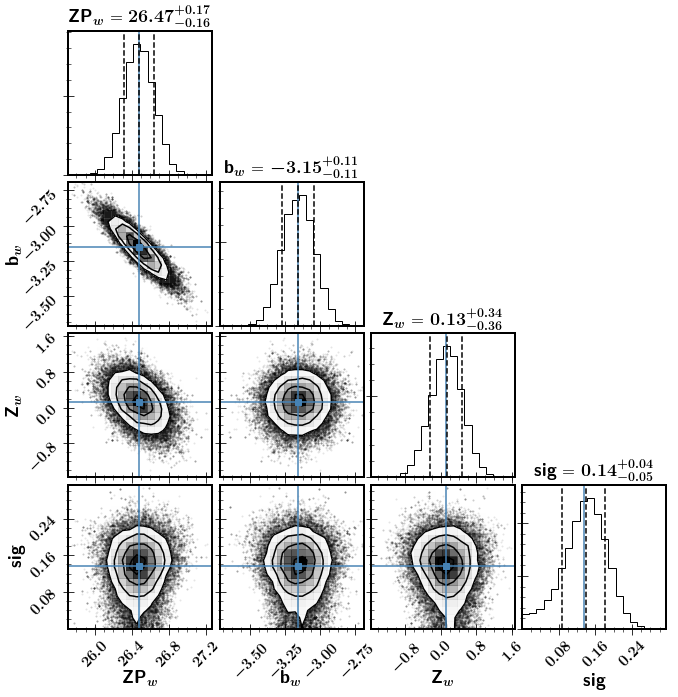

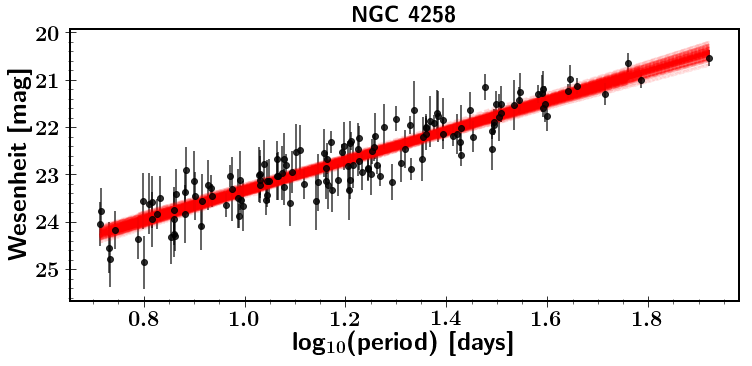

In [21]:
# Let's try EMCEE !!!
import emcee
import random


#P-L relation: m WH = zpW,NGC4258 + bW log P + ZW ∆log (O/H) .
def pl_model(theta, P, Z):
    zpw,bw,Zw,sig_int=theta
    return zpw + bw*np.log10(P) + Zw*(Z-Z_ref)

#Define likelihood: a Gaussian where the variance is underestimated by some fractional amount: sig_int
def lnlike(theta, P, Z, mag, err_mag):    
    model = pl_model(theta, P, Z)
    sig_int=abs(theta[3])
    sig_mag=np.array(err_mag)

    sigma_total=np.array(sig_mag)**2+(sig_int)**2 #error tot= error magnitude +intrinsic scatter in the relation
    inv_sigma_total = 1.0/sigma_total
    #Gaussian distribution: log_L=-1/2*sum[log(2pi)+log(err^2)+(mag-model)/err)^2]
    return -0.5*np.sum(np.log(2*np.pi)+np.log(sigma_total)+(mag-model)**2*inv_sigma_total)
nll = lambda *args: -lnlike(*args)

#Define the prior
def lnprior(theta):
    zpw, bw, zw, sig_int = theta
    if -200.0 <= zpw <= 200.0 and -20 <= bw <= 20 and -20 <= zw <= 20. and 0.0 <= sig_int <= 1.:
        return 0.0
    return -np.inf


#the full log-probability function
def lnprob(theta, P, Z, mag, err_mag):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, P, Z, mag, err_mag)

# Let's minimise the Likelihood to have an idea of the initial guess
from scipy.optimize import minimize
res_mini= minimize(nll, [23,-30,-0.5,-0.5],args=(per_N4258, Z_N4258, wesmags_N4258, err_mag_N4258))

ndim, nwalkers = 4, 200
initial_zpw, initial_bw, initial_zw, initial_lnf = res_mini['x']
pos = [(initial_zpw, initial_bw, initial_zw, initial_lnf) + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]


sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(per_N4258, Z_N4258, wesmags_N4258, err_mag_N4258),threads=3)
niterations = 500
sampler.reset()
sampler.run_mcmc(pos, niterations)

print("Mean acceptance fraction:{0:.3f}".format(np.mean(sampler.acceptance_fraction)))
labels = [r'\textbf{ZP$_{w}$}', r'\textbf{b$_{w}$}', r'\textbf{Z$_{w}$}',r'\textbf{sig}']
fig, axes = plt.subplots(4, figsize=(10, 7), sharex=True)
for i in range(ndim):
    ax = axes[i]
    ax.plot(sampler.chain[:,:,i].T, '-', color='k', alpha=0.3)
    ax.axhline(res_mini['x'][i], color='red',label=r'\textbf{ML}')
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel(r'\textbf{step number}')
axes[0].legend(loc=0,title='',markerscale=0.5,ncol=1,prop={'size':12})

# We can remove the first steps
nburns=50
samples=sampler.chain[:, nburns:, :].reshape((-1,ndim))

#Let's plot the solution
plt.rcParams['ytick.labelsize']=15 #fontsize of tick labels
plt.rcParams['xtick.labelsize']=15 #fontsize of tick labels
import corner
fig=corner.corner(samples,labels=labels,quantiles=[0.16, 0.5, 0.84],show_titles=True,truths=res_mini['x'] ,label_kwargs={"fontsize": 18,"fontweight":'bold','labelpad':0},title_kwargs={"fontsize": 18,"fontweight":'bold'})

plt.rcParams['ytick.labelsize']=22 #fontsize of tick labels
plt.rcParams['xtick.labelsize']=22 #fontsize of tick labels
#Finally, we can also plot the projection of all results into the space of the observed data.
fig,ax1 = plt.subplots(figsize=(12,5), facecolor='w', edgecolor='k')
inds = np.random.randint(len(samples), size=200) # we only plot 200 random slopes
for ind in inds:
    sample = samples[ind]
    ax1.plot(np.log10(per_N4258), pl_model(sample, per_N4258, Z_N4258), 'r--', alpha=0.1,zorder=2)

ax1.errorbar(np.log10(per_N4258), wesmags_N4258,yerr=err_mag_N4258,marker='o',color='k',alpha=0.8,linestyle='None')
ax1.set_ylabel(r'\textbf{Wesenheit [mag]}')
ax1.set_xlabel(r'\textbf{log$_{10}$(period) [days]}')
ax1.set_title(r'\textbf{NGC 4258}')
plt.gca().invert_yaxis()    


Later in this problem, you will have to sample from a model in about 25 dimensions. This is sufficiently
high dimensionality that emcee, the ensemble sampler we’ve used in the past, will not work well. Achieving
convergence with emcee would take an impractically large number of steps. More dangerously, samplers like
emcee are liable to produce trace plots in high-dimensional problems that make it look very much like they have converged, long before they really have.
Instead of using emcee, we’ll implement and sample models in Stan, which is a powerful language designed
for hierarchical statistical modeling. It is implemented in C++ and is very fast. Stan uses a Hamiltonian
Monte Carlo sampler (specifically, a “No-U-Turn-Sampler”), which offers several advantages over traditional
sampling methods. The easiest way for you to implement a Stan model for this problem is to use the python
package pystan.
As a warm up, use Stan to measure the period-apparent magnitude relation for Cepheids in NGC 4258.
Show a corner plot of your marginalized constraints and their covariances.

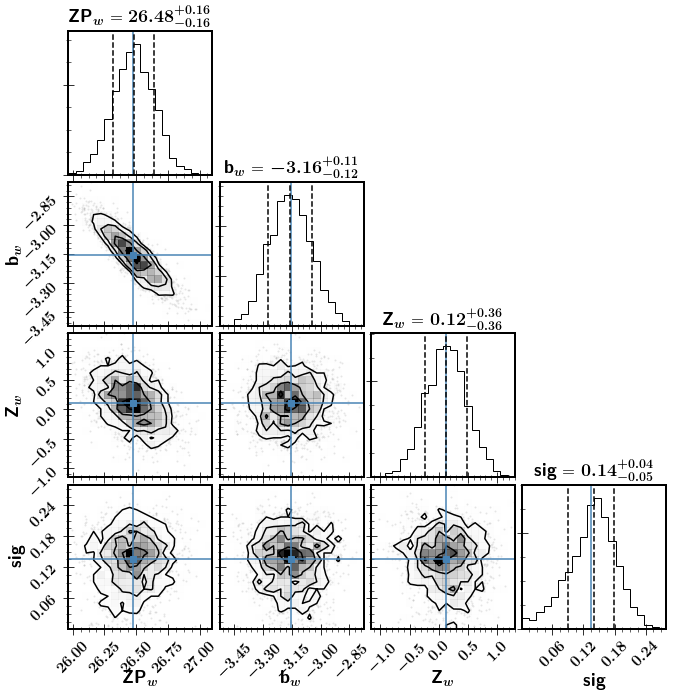

In [22]:
## now use pystan to fit
import pystan
stan_code = """
data {{
// define the data within Stan
int<lower=0> N;           // number of data points    
vector[N] P;                // log(P) values
vector[N] Z;                // Z - Z_ref values
vector[N] mag;               // mag            
vector[N] err_mag;  // err_mag
}}
parameters {{
// model parameters
real <lower=20, upper=35> ZPw;                 //  intercept              
real <lower=-5, upper=-2> bw;                 //  period slope
real <lower=-2, upper=2> Zw;                 // metallicity slope
real <lower=0, upper=1> sig;                // intrinsic scatter
}}
transformed parameters{{
// construct the model
real theta[N];
for (j in 1:N)
theta[j] = ZPw + bw*P[j] + Zw*Z[j];
      
}}
model {{
ZPw ~ uniform({ZPw_lower}, {ZPw_upper});     // prior on intercept 
bw ~ uniform({bw_lower}, {bw_upper});   // prior on period slope
Zw ~ uniform({Zw_lower}, {Zw_upper});   // prior on metallicity slope
sig ~ uniform({sig_lower}, {sig_upper});   // prior on intrinsic dispersion
mag ~ normal(theta, sqrt(square(err_mag) + square(sig))); // data points have a normal distribution -> Gaussian likelihood function
}}
"""

# set the data
model_data = {'N': len(per_N4258),
               'P': np.log10(per_N4258),
               'Z': Z_N4258 - Z_ref,
               'mag': wesmags_N4258,
               'err_mag': err_mag_N4258 } 

# set prior characteristics 
 # if -200.0 <= zpw <= 200.0 and -20 <= bw <= 20 and -20 <= zw <= 20. and -3.0 <= lnf <= 1.:
stan_dict = {}
stan_dict['ZPw_lower'] = 20
stan_dict['ZPw_upper'] = 35
stan_dict['bw_lower'] = -5
stan_dict['bw_upper'] = -2
stan_dict['Zw_lower'] = -2
stan_dict['Zw_upper'] = 2
stan_dict['sig_lower'] = 0
stan_dict['sig_upper'] = 1


Nsamples = 1000 # number of samples
warmup = 500 # number of burn in samples (stan default is half of Nsamples)
chains = 4 # number of chains
thin = 1 # discard every n=thin samples in the end 
seed = 128 # random seed for starting the chain

# create the model
sm = pystan.StanModel(model_code=stan_code.format(**stan_dict))

# run the model
fit = sm.sampling(data=model_data, iter=Nsamples, chains=chains, warmup=warmup, thin=thin, seed=seed)

la = fit.extract(permuted=True)   # fit contains all information on chains
postsamples = np.vstack((la['ZPw'], la['bw'], la["Zw"], la["sig"])).T  # pull out parameters of interest and reshape them
plt.rcParams['ytick.labelsize']=15 #fontsize of tick labels
plt.rcParams['xtick.labelsize']=15 #fontsize of tick labels
fig = corner.corner(postsamples, labels=labels, quantiles=[0.16, 0.5, 0.84],show_titles=True,truths=res_mini['x'] ,label_kwargs={"fontsize": 18,"fontweight":'bold','labelpad':0},title_kwargs={"fontsize": 18,"fontweight":'bold'})  # let's make a corner plot
plt.rcParams['ytick.labelsize']=22 #fontsize of tick labels
plt.rcParams['xtick.labelsize']=22 #fontsize of tick labels

Both values derived EMCEE or PYSTAN are idendical as we can see in the figure above where the blue lines correspond to the values obtained with EMCEE